<a href="https://colab.research.google.com/github/gohenry/DataScienceCoursera/blob/master/Copy_of_ArtAuction_1116_4pm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount ('/content/drive', force_remount = True)

In [0]:
cd /content/drive/My Drive

In [0]:
ls

'Colab Notebooks'/   result_2009.xlsx          result2.xlsx
 images/            'result_2017_2018 .xlsx'   result.xlsx


In [0]:
#import the necessary packages
from __future__ import absolute_import, division, print_function, unicode_literals
import functools
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 

Using TensorFlow backend.


In [0]:
#load numerical data using Pandas
!pip install -q xlrd
!pip install pillow

cols = ['author','creation_year','height(inch)','width(inch)','estimate_low($)','estimate_high','auction_year','artist_birth','hammer price', 'artist_rank','artist_points','num_bill','wealth_bill','canvas','paper','Acrylic','oil','Mixed media','image']
df = pd.read_excel('result_2009.xlsx', usecols=cols)
df = pd.get_dummies(df, prefix=['auth'], columns = ['author'])
df



,creation_year,height(inch),width(inch),estimate_low($),estimate_high,hammer price,auction_year,image,artist_birth,artist_rank,artist_points,num_bill,wealth_bill,canvas,paper,Acrylic,Mixed media,oil,auth_Ai Weiwei,auth_Alberto Giacometti,auth_Alex Katz,auth_Alexander Calder,auth_Alighiero Boëtti,auth_Andy Warhol,auth_Anselm Kiefer,auth_Antoni Tàpies,auth_Arnulf Rainer,auth_Carl Andre,auth_Christian Boltanski,auth_Christian Marclay,auth_Cindy Sherman,auth_Claes Oldenburg,auth_Cy Twombly,auth_Damien Hirst,auth_Dan Graham,auth_Daniel Buren,auth_David Hockney,auth_Dieter Roth,auth_Douglas Gordon,auth_Ed Ruscha,...,auth_Joseph Beuys,auth_Kader Attia,auth_Kiki Smith,auth_Lawrence Weiner,auth_Louise Bourgeois,auth_Lucio Fontana,auth_Man Ray,auth_Marcel Broodthaers,auth_Marcel Duchamp,auth_Maria Lassnig,auth_Marina Abramovic,auth_Marlene Dumas,auth_Martin Kippenberger,auth_Max Ernst,auth_Mike Kelley,auth_Mona Hatoum,auth_Nam June Paik,auth_Olafur Eliasson,auth_Pablo Picasso,auth_Paul Klee,auth_Paul McCarthy,auth_Pierre Huyghe,auth_Richard Long,auth_Richard Prince,auth_Richard Serra,auth_Rirkrit Tiravanija,auth_Robert Mapplethorpe,auth_Robert Rauschenberg,auth_Rosemarie Trockel,auth_Roy Lichtenstein,auth_Sigmar Polke,auth_Sol LeWitt,auth_Tacita Dean,auth_Thomas Ruff,auth_Thomas Schütte,auth_Tony Cragg,auth_Valie Export,auth_William Kentridge,auth_Yayoi Kusama,auth_Yoko Ono
0,1964.0,5.0,5.0,150000.0,200000.0,NaN,2019.0,images/Andy Warhol-Flowers-1-0.jpg,1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1964.0,22.0,22.0,1500000.0,2000000.0,1150000.0,2019.0,images/Andy Warhol-Flowers-1-1.jpg,1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1985.0,20.0,16.0,60000.0,80000.0,NaN,2019.0,images/Andy Warhol-Self-Defense (Positive)-1-2...,1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1985.0,20.0,16.0,60000.0,80000.0,50000.0,2019.0,images/Andy Warhol-Self-Defense (Negative)-1-3...,1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1983.0,20.0,16.0,50000.0,70000.0,70000.0,2019.0,images/Andy Warhol-Untitled (Four)-1-4.jpg,1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14699,1999.0,2.0,15.0,149320.0,223980.0,313572.0,2010.0,images/Marlene Dumas-Dancer-3-13.jpg,1953.0,114.0,14262.10,1011.0,3.6,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14700,1994.0,2.0,19.0,218820.0,281340.0,484530.0,2010.0,"images/Marlene Dumas-""The Peeping Tom ""-3-14.jpg",1953.0,114.0,14262.10,1011.0,3.6,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14701,1995.0,79.0,39.0,250000.0,350000.0,440000.0,2009.0,images/Marlene Dumas-Evil Eye-3-15.jpg,1953.0,98.0,14765.08,793.0,2.4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14702,1996.0,49.0,27.0,70000.0,100000.0,60000.0,2009.0,images/Marlene Dumas-Transparent Slip-3-16.jpg,1953.0,98.0,14765.08,793.0,2.4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [0]:
#drop rows containing missing data
ccols = ['creation_year','height(inch)','width(inch)','estimate_low($)','estimate_high','auction_year','artist_birth','hammer price', 'artist_rank','artist_points','num_bill','wealth_bill','canvas','paper','Acrylic','oil','Mixed media']
df[ccols] = df[ccols].apply(pd.to_numeric, errors='coerce')
df = df.dropna()
df

,creation_year,height(inch),width(inch),estimate_low($),estimate_high,hammer price,auction_year,image,artist_birth,artist_rank,artist_points,num_bill,wealth_bill,canvas,paper,Acrylic,Mixed media,oil,auth_Ai Weiwei,auth_Alberto Giacometti,auth_Alex Katz,auth_Alexander Calder,auth_Alighiero Boëtti,auth_Andy Warhol,auth_Anselm Kiefer,auth_Antoni Tàpies,auth_Arnulf Rainer,auth_Carl Andre,auth_Christian Boltanski,auth_Christian Marclay,auth_Cindy Sherman,auth_Claes Oldenburg,auth_Cy Twombly,auth_Damien Hirst,auth_Dan Graham,auth_Daniel Buren,auth_David Hockney,auth_Dieter Roth,auth_Douglas Gordon,auth_Ed Ruscha,...,auth_Joseph Beuys,auth_Kader Attia,auth_Kiki Smith,auth_Lawrence Weiner,auth_Louise Bourgeois,auth_Lucio Fontana,auth_Man Ray,auth_Marcel Broodthaers,auth_Marcel Duchamp,auth_Maria Lassnig,auth_Marina Abramovic,auth_Marlene Dumas,auth_Martin Kippenberger,auth_Max Ernst,auth_Mike Kelley,auth_Mona Hatoum,auth_Nam June Paik,auth_Olafur Eliasson,auth_Pablo Picasso,auth_Paul Klee,auth_Paul McCarthy,auth_Pierre Huyghe,auth_Richard Long,auth_Richard Prince,auth_Richard Serra,auth_Rirkrit Tiravanija,auth_Robert Mapplethorpe,auth_Robert Rauschenberg,auth_Rosemarie Trockel,auth_Roy Lichtenstein,auth_Sigmar Polke,auth_Sol LeWitt,auth_Tacita Dean,auth_Thomas Ruff,auth_Thomas Schütte,auth_Tony Cragg,auth_Valie Export,auth_William Kentridge,auth_Yayoi Kusama,auth_Yoko Ono
1,1964.0,22.0,22.0,1500000.0,2000000.0,1150000.0,2019.0,images/Andy Warhol-Flowers-1-1.jpg,1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1985.0,20.0,16.0,60000.0,80000.0,50000.0,2019.0,images/Andy Warhol-Self-Defense (Negative)-1-3...,1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1983.0,20.0,16.0,50000.0,70000.0,70000.0,2019.0,images/Andy Warhol-Untitled (Four)-1-4.jpg,1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1976.0,8.0,11.0,70000.0,100000.0,70000.0,2019.0,images/Andy Warhol-Torso-1-5.jpg,1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1985.0,8.0,16.0,30000.0,50000.0,72000.0,2019.0,"images/Andy Warhol-Are You ""Different?"" (Posit...",1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14699,1999.0,2.0,15.0,149320.0,223980.0,313572.0,2010.0,images/Marlene Dumas-Dancer-3-13.jpg,1953.0,114.0,14262.10,1011.0,3.6,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14700,1994.0,2.0,19.0,218820.0,281340.0,484530.0,2010.0,"images/Marlene Dumas-""The Peeping Tom ""-3-14.jpg",1953.0,114.0,14262.10,1011.0,3.6,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14701,1995.0,79.0,39.0,250000.0,350000.0,440000.0,2009.0,images/Marlene Dumas-Evil Eye-3-15.jpg,1953.0,98.0,14765.08,793.0,2.4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14702,1996.0,49.0,27.0,70000.0,100000.0,60000.0,2009.0,images/Marlene Dumas-Transparent Slip-3-16.jpg,1953.0,98.0,14765.08,793.0,2.4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f275a5d6438>]],
      dtype=object)

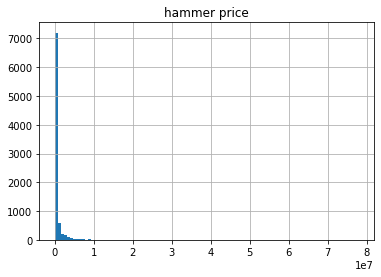

In [0]:
#check distribution of hammer price
df.hist(column='hammer price', bins=100)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2733f5e4a8>]],
      dtype=object)

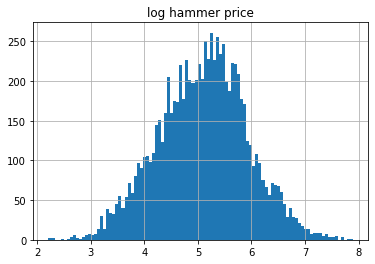

In [0]:
#create log hammer price
df['log hammer price'] = np.log10(df['hammer price'])
df.hist(column='log hammer price', bins=100)

In [0]:
#drop 'hammer price' column
df.drop(columns='hammer price')

,creation_year,height(inch),width(inch),estimate_low($),estimate_high,auction_year,image,artist_birth,artist_rank,artist_points,num_bill,wealth_bill,canvas,paper,Acrylic,Mixed media,oil,auth_Ai Weiwei,auth_Alberto Giacometti,auth_Alex Katz,auth_Alexander Calder,auth_Alighiero Boëtti,auth_Andy Warhol,auth_Anselm Kiefer,auth_Antoni Tàpies,auth_Arnulf Rainer,auth_Carl Andre,auth_Christian Boltanski,auth_Christian Marclay,auth_Cindy Sherman,auth_Claes Oldenburg,auth_Cy Twombly,auth_Damien Hirst,auth_Dan Graham,auth_Daniel Buren,auth_David Hockney,auth_Dieter Roth,auth_Douglas Gordon,auth_Ed Ruscha,auth_Erwin Wurm,...,auth_Kader Attia,auth_Kiki Smith,auth_Lawrence Weiner,auth_Louise Bourgeois,auth_Lucio Fontana,auth_Man Ray,auth_Marcel Broodthaers,auth_Marcel Duchamp,auth_Maria Lassnig,auth_Marina Abramovic,auth_Marlene Dumas,auth_Martin Kippenberger,auth_Max Ernst,auth_Mike Kelley,auth_Mona Hatoum,auth_Nam June Paik,auth_Olafur Eliasson,auth_Pablo Picasso,auth_Paul Klee,auth_Paul McCarthy,auth_Pierre Huyghe,auth_Richard Long,auth_Richard Prince,auth_Richard Serra,auth_Rirkrit Tiravanija,auth_Robert Mapplethorpe,auth_Robert Rauschenberg,auth_Rosemarie Trockel,auth_Roy Lichtenstein,auth_Sigmar Polke,auth_Sol LeWitt,auth_Tacita Dean,auth_Thomas Ruff,auth_Thomas Schütte,auth_Tony Cragg,auth_Valie Export,auth_William Kentridge,auth_Yayoi Kusama,auth_Yoko Ono,log hammer price
1,1964.0,22.0,22.0,1500000.0,2000000.0,2019.0,images/Andy Warhol-Flowers-1-1.jpg,1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.060698
3,1985.0,20.0,16.0,60000.0,80000.0,2019.0,images/Andy Warhol-Self-Defense (Negative)-1-3...,1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.698970
4,1983.0,20.0,16.0,50000.0,70000.0,2019.0,images/Andy Warhol-Untitled (Four)-1-4.jpg,1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.845098
5,1976.0,8.0,11.0,70000.0,100000.0,2019.0,images/Andy Warhol-Torso-1-5.jpg,1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.845098
6,1985.0,8.0,16.0,30000.0,50000.0,2019.0,"images/Andy Warhol-Are You ""Different?"" (Posit...",1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.857332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14699,1999.0,2.0,15.0,149320.0,223980.0,2010.0,images/Marlene Dumas-Dancer-3-13.jpg,1953.0,114.0,14262.10,1011.0,3.6,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.496337
14700,1994.0,2.0,19.0,218820.0,281340.0,2010.0,"images/Marlene Dumas-""The Peeping Tom ""-3-14.jpg",1953.0,114.0,14262.10,1011.0,3.6,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.685321
14701,1995.0,79.0,39.0,250000.0,350000.0,2009.0,images/Marlene Dumas-Evil Eye-3-15.jpg,1953.0,98.0,14765.08,793.0,2.4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.643453
14702,1996.0,49.0,27.0,70000.0,100000.0,2009.0,images/Marlene Dumas-Transparent Slip-3-16.jpg,1953.0,98.0,14765.08,793.0,2.4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0

In [0]:
df['image'].replace({'\n':' '},inplace=True,regex=True)

#df[~df['image'].isin(to_drop)]

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [0]:
#bin log hammer price
bins = [0,3,3.25,3.5, 3.75, 4,4.25,4.5,4.75, 5,5.25, 5.5,5.75,6,6.25,6.5,6.75,7,7.25,7.5,7.75,8]
labels = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
df['binned'] = pd.cut(df['log hammer price'], bins=bins, labels=labels)
print(df)
df.shape
len(labels)

       creation_year  height(inch)  ...  log hammer price  binned
1             1964.0          22.0  ...          6.060698      13
3             1985.0          20.0  ...          4.698970       7
4             1983.0          20.0  ...          4.845098       8
5             1976.0           8.0  ...          4.845098       8
6             1985.0           8.0  ...          4.857332       8
...              ...           ...  ...               ...     ...
14699         1999.0           2.0  ...          5.496337      10
14700         1994.0           2.0  ...          5.685321      11
14701         1995.0          79.0  ...          5.643453      11
14702         1996.0          49.0  ...          4.778151       8
14703         1986.0          39.0  ...          3.032216       1

[8559 rows x 108 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


21

In [0]:
#create X and Y
dataset = df.values
X = dataset[:, :105]
Y = dataset[:,107]
X_image = dataset[:,7]

print(X_image.shape, Y.shape)

(8559,) (8559,)


In [16]:
ls

'Colab Notebooks'/   result_2009.xlsx          result2.xlsx
 images/            'result_2017_2018 .xlsx'   result.xlsx


images/Andy Warhol-Heaven and Hell Are Just One Breath Away (Positive and Negati                 ...-28-20.jpg
images/Andy Warhol-Heaven and Hell Are Just One Breath Away (Positive and Negati                 ...-28-20.jpg


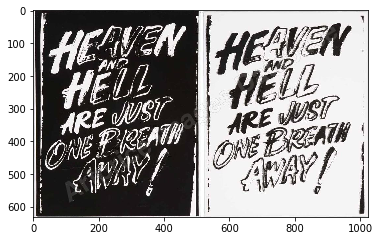

In [30]:
load_image = X_image[200:600]
problem_image = 'images/Andy Warhol-Heaven and Hell Are Just One Breath Away (Positive and Negati                 ...-28-20.jpg' #X_image[510]
print(X_image[510])
load_bin = Y[200:600]
#load_image
print(problem_image)

imgg = mpimg.imread(X_image[510]) 
# Output Images 
plt.imshow(imgg) 


In [31]:
load_bin

array([9, 7, 8, 10, 8, 6, 8, 7, 8, 10, 6, 7, 9, 9, 12, 7, 8, 9, 10, 10, 8,
       16, 12, 10, 12, 10, 9, 8, 8, 8, 9, 6, 6, 12, 13, 12, 12, 11, 11,
       11, 10, 9, 7, 9, 9, 15, 11, 12, 11, 10, 8, 9, 7, 17, 15, 16, 10, 7,
       6, 6, 7, 17, 8, 10, 9, 8, 7, 13, 14, 13, 9, 9, 8, 9, 6, 7, 10, 13,
       11, 13, 14, 13, 11, 16, 8, 11, 8, 8, 12, 12, 12, 12, 11, 10, 12,
       11, 10, 10, 8, 9, 8, 7, 8, 9, 9, 9, 8, 14, 12, 14, 12, 15, 8, 10,
       11, 9, 8, 15, 9, 9, 11, 10, 13, 15, 12, 12, 12, 11, 9, 15, 13, 13,
       9, 9, 9, 12, 8, 7, 7, 11, 9, 9, 9, 16, 14, 6, 10, 13, 12, 12, 10,
       10, 7, 9, 10, 13, 9, 8, 8, 13, 3, 9, 8, 10, 9, 7, 11, 11, 9, 11,
       11, 9, 9, 13, 16, 8, 8, 9, 6, 12, 9, 8, 10, 7, 7, 11, 11, 9, 9, 9,
       2, 13, 12, 11, 11, 11, 11, 11, 12, 10, 10, 10, 9, 12, 11, 12, 13,
       12, 11, 10, 14, 15, 14, 13, 12, 9, 12, 12, 10, 11, 13, 12, 10, 11,
       8, 10, 17, 9, 8, 8, 8, 7, 7, 9, 17, 7, 7, 11, 8, 7, 4, 4, 14, 9,
       13, 12, 15, 14, 10, 9, 9, 11, 8, 8, 8, 9

In [32]:
# Test section

from PIL import Image
from skimage.transform import resize
from keras.preprocessing import image


x_Image_array = []

for f in load_image:
    img = image.load_img(f)
    img = img.resize((220,220))
    img = image.img_to_array(img)
    x_Image_array.append(img)


x_Image_array = np.array(x_Image_array)
x_Image_array.shape



(400, 220, 220, 3)

In [0]:
#from PIL import Image
#from skimage.transform import resize

#x_Image_array = np.array([np.array(Image.open(fname)) for fname in load_image])

#initialize destination array 
#x_Image_array_resized = x_Image_array

#for i in range(1,len(x_Image_array)):
#  x_Image_array_resized[i] = resize(x_Image_array[i], (220,220))

#imgg = mpimg.imread(load_image) 
# Output Images 
#plt.imshow(imgg) 

#testing 
#plt.imshow(x_Image_array_resized[99])
#x_Image_array_resized[90].shape

In [33]:
# one-hot encode the log hammer price
encoder = LabelEncoder()
encoder.fit(load_bin)
encoded_load_bin = encoder.transform(load_bin)
dummy_load_bin = np_utils.to_categorical(encoded_load_bin) 
print(dummy_load_bin)
print(dummy_load_bin.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(400, 17)


In [34]:
# split training set and test set
x_Image_array_resized_train, x_Image_array_resized_test, load_bin_train, load_bin_test = train_test_split(x_Image_array, dummy_load_bin, test_size=0.25)
#print(x_Image_array_resized_train.shape, load_bin_train.shape,x_Image_array_resized_test.shape, load_bin_test.shape)
#print(x_Image_array_resized_test[0])


x_train = x_Image_array_resized_train/255
x_test = x_Image_array_resized_test/255
y_train = load_bin_train
y_test = load_bin_test

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(300, 220, 220, 3) (100, 220, 220, 3) (300, 17) (100, 17)


In [0]:
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
#from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

def ArtModel (input_shape):

  X_input = Input(input_shape)
  X = ZeroPadding2D((3,3))(X_input)
  X = Conv2D(32,(7,7), strides = (1,1), name = 'conv0')(X)
  X = BatchNormalization(axis=3, name = 'bn0')(X)
  X = MaxPooling2D((2,2), name='max_pool0')(X)
   
  X = ZeroPadding2D((3,3))(X_input)
  X = Conv2D(32,(7,7), strides = (1,1), name = 'conv1')(X)
  X = BatchNormalization(axis=3, name = 'bn1')(X)
  X = MaxPooling2D((2,2), name='max_pool1')(X)
  
  X = ZeroPadding2D((3,3))(X_input)
  X = Conv2D(32,(7,7), strides = (1,1), name = 'conv2')(X)
  X = BatchNormalization(axis=3, name = 'bn2')(X)
  X = MaxPooling2D((2,2), name='max_pool2')(X)
  
  X = Flatten()(X)
  X = Dense(17, activation = 'softmax', name='fc')(X)
    
  model = Model(inputs = X_input, outputs = X, name='ArtModel')
    
  return model


In [36]:
# Create Model
artModel = ArtModel((220,220,3))

# Compile Model
artModel.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=["accuracy"])


In [37]:
# Train Model
artModel.fit(x=x_train, y=y_train, epochs = 10, batch_size = 32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
300/300 [==============================] - 30s 99ms/step - loss: 13.1935 - acc: 0.1000
Epoch 2/10
300/300 [==============================] - 28s 93ms/step - loss: 13.3527 - acc: 0.1633
Epoch 3/10
300/300 [==============================] - 29s 95ms/step - loss: 13.7004 - acc: 0.1500
Epoch 4/10
300/300 [==============================] - 28s 93ms/step - loss: 13.8261 - acc: 0.1400
Epoch 5/10
300/300 [==============================] - 28s 94ms/step - loss: 13.6467 - acc: 0.1533
Epoch 6/10
300/300 [==============================] - 28s 93ms/step - loss: 13.6123 - acc: 0.1500
Epoch 7/10
300/300 [==============================] - 28s 93ms/step - loss: 13.8292 - acc: 0.1400
Epoch 8/10
300/300 [==============================] - 28s 93ms/step - loss: 13.9091 - acc: 0.1367
Epoch 9/10
300/300 [==============================] - 28s 93ms/step - loss: 13.9872 - acc: 0.1300
Epoch 10/10
300/300 [=

In [38]:
preds = artModel.evaluate(x = x_test, y=y_test)

print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

100/100 [==============================] - 4s 40ms/step

Loss = 14.34510467529297
Test Accuracy = 0.11


In [0]:
######################### Image CNN is above ####################
######################### TEXT denseNet is below ################

In [0]:
 #standardize X_train and X_test using mean and standard deviation of training samples
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [0]:
X_train_scaled

In [0]:
#Create model
model = Sequential()

#Add more layers
model.add(Dense(128, activation='relu', input_shape = (105,), kernel_initializer='normal'))
#model.add(Dropout(0.2))
model.add(Dense(128, activation='relu', kernel_initializer='normal'))
#model.add(Dropout(0.2))
model.add(Dense(64, activation='relu', kernel_initializer='normal'))
#model.add(Dropout(0.2))
model.add(Dense(64, activation='relu', kernel_initializer='normal'))
#model.add(Dropout(0.2))
model.add(Dense(22, activation='softmax', kernel_initializer='normal'))

In [0]:
# complie the model using adam optimizer and categorical crossentropy 
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
# train the model
hist = model.fit(X_train_scaled, Y_train, batch_size=64, epochs=200,validation_split=0.1)

In [0]:
model.evaluate(X_test_scaled, Y_test)

In [0]:
# plot the loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

In [0]:
#plot the accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'lower right')
plt.show()